<a href="https://colab.research.google.com/github/anu-crtl/BEHRT_SESSTIM/blob/master/AutoCNN_Breast_Cancer_Random_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import math
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import tensorflow as tf
import keras.layers
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import os
import numpy as np
import pandas as pd
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score

# CSV TO IMAGE
(already built dont need to run again )

In [4]:
image_folder = '/content/drive/MyDrive/Breast_Cancer/DATA_BREAST_CANCER_FINAL'
csv_folder= '/content/drive/MyDrive/Breast_Cancer/DATA_Breast_cancer_CSV'

In [5]:
! ls

drive  sample_data


In [37]:
count=0
names=[]
for name in sorted(os.listdir(csv_folder)):

    if name.endswith(".csv"):
        names.append(name)
        data = pd.read_csv(os.path.join(csv_folder, name), header=None)
        data = data.iloc[: , 1:]
        data = np.array(data)
        #count=count +1
        cv2.imwrite(image_folder +'/'+ str(name) + '.png',data )
print(names)




['patient_1101100325.csv', 'patient_1101100717.csv', 'patient_1101100766.csv', 'patient_1102100494.csv', 'patient_1102101103.csv', 'patient_1102101659.csv', 'patient_1102102186.csv', 'patient_1103100275.csv', 'patient_1103101510.csv', 'patient_1103102437.csv', 'patient_1103102474.csv', 'patient_1104101200.csv', 'patient_1104101230.csv', 'patient_1105102171.csv', 'patient_1106100062.csv', 'patient_1106100106.csv', 'patient_1106101233.csv', 'patient_1106101234.csv', 'patient_1106103328.csv', 'patient_1110100626.csv', 'patient_1110103197.csv', 'patient_1110103680.csv', 'patient_1110103767.csv', 'patient_1111100068.csv', 'patient_1111100468.csv', 'patient_1111102649.csv', 'patient_1112102081.csv', 'patient_1112102730.csv', 'patient_1113100226.csv', 'patient_1113101084.csv', 'patient_1113101146.csv', 'patient_1113101277.csv', 'patient_1113101523.csv', 'patient_1113101669.csv', 'patient_1113101835.csv', 'patient_1113101850.csv', 'patient_1113102912.csv', 'patient_1113103114.csv', 'patient_11

# LOAD IMAGES + TRAIN TEST
````



In [17]:

img_folder='/content/drive/MyDrive/Breast_Cancer/DATA_BREAST_CANCER_FINAL'
images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob('/content/drive/MyDrive/Breast_Cancer/DATA_BREAST_CANCER_FINAL/*.png')]
print(len(images))
images[1]

925


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
df=pd.read_csv("/content/drive/MyDrive/Breast_Cancer/ENQUETE_2")


UnicodeDecodeError: ignored

# IMAGE FILTERING

In [41]:
df=pd.read_pickle("/content/drive/MyDrive/Breast_Cancer/ENQUETE_2")
df.shape


(930, 2)

In [42]:
name_2 = df['ID_PATIENT']
#name_2=[str(x) for x in name_2]
name_2=['patient_'+ str(x) + '.csv' for x in name_2]
diff = set(name_2).difference(names)
diff


{'patient_1202100561.csv',
 'patient_1203400338.csv',
 'patient_3104001255.csv',
 'patient_3205200883.csv',
 'patient_4302701883.csv'}

  Patients missing in images

1. patient_1202100561.csv',
2. patient_1203400338.csv',
3. patient_3104001255.csv
4. patient_3205200883.csv
5. patient_4302701883.csv



In [44]:
from numpy.core.fromnumeric import shape
remove=['patient_1202100561.csv','patient_1203400338.csv','patient_3104001255.csv','patient_3205200883.csv','patient_4302701883.csv']
index = [321,332,601,744,910]
labels=df.drop(index = index)
print(labels.shape)
labels.to_csv('label.csv', index=0)





(925, 2)


# TRAIN TEST SPLIT

In [19]:
img_folder='/content/drive/MyDrive/Breast_Cancer/DATA_BREAST_CANCER_FINAL'
images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob('/content/drive/MyDrive/Breast_Cancer/DATA_BREAST_CANCER_FINAL/*.png')]
print(len(images))
images[1]

925


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
labels=pd.read_csv('/content/drive/MyDrive/Breast_Cancer/label.csv')
label=labels['peur_recidive1']
len(label)


925

In [21]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding

ncoder = OneHotEncoder(sparse=False)
# transform data
label=label.to_numpy()
label=label.reshape(-1,1)
onehot = ncoder.fit_transform(label)
print(len(onehot))


925


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, onehot, test_size=0.2, random_state=42)

In [11]:
x_train = np.reshape(X_train, (len(X_train), 100, 8058))
x_test = np.reshape(X_test, (len(X_test), 100, 8058))


In [12]:
x_train.shape

(740, 100, 8058)

# CNN + Extract featurs

In [13]:
from keras.layers.serialization import activation
input_img = keras.Input(shape=(100,8058))
x = layers.Conv1D(16, 1, activation='relu', padding='same')(input_img)
x = layers.MaxPooling1D(2, padding='same')(x)
x = layers.Conv1D(8, 1, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(2, padding='same')(x)
x = layers.Conv1D(4, 1, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(2, padding='same')(x)
x = layers.Conv1D(2, 1, activation='relu', padding='same')(x)

x = layers.MaxPooling1D(2, padding='same')(x)
flat=layers.Flatten()(x)
encoded= layers.Dense(3, activation='softmax')(flat)




In [14]:
cnn_model = keras.Model(input_img, encoded)
cnn_model.summary()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 8058)]       0         
                                                                 
 conv1d (Conv1D)             (None, 100, 16)           128944    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 16)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 8)             136       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 25, 8)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 25, 4)             36    

In [15]:
history=cnn_model.fit(x_train,y_train, epochs= 10,batch_size=32,
                validation_data=[x_test, y_test])
print(history.history.keys())




Epoch 1/10
24/24 [==============================] - 6s 205ms/step - loss: 1.0884 - val_loss: 1.0739
Epoch 2/10
24/24 [==============================] - 6s 266ms/step - loss: 0.9767 - val_loss: 1.0781
Epoch 3/10
24/24 [==============================] - 5s 200ms/step - loss: 0.8543 - val_loss: 1.1182
Epoch 4/10
24/24 [==============================] - 5s 210ms/step - loss: 0.6966 - val_loss: 1.1600
Epoch 5/10
24/24 [==============================] - 6s 242ms/step - loss: 0.5256 - val_loss: 1.2175
Epoch 6/10
24/24 [==============================] - 5s 193ms/step - loss: 0.3800 - val_loss: 1.3625
Epoch 7/10
24/24 [==============================] - 6s 248ms/step - loss: 0.2483 - val_loss: 1.5130
Epoch 8/10
24/24 [==============================] - 5s 209ms/step - loss: 0.1458 - val_loss: 1.7395
Epoch 9/10
24/24 [==============================] - 5s 193ms/step - loss: 0.0835 - val_loss: 1.9422
Epoch 10/10
24/24 [==============================] - 6s 260ms/step - loss: 0.0491 - val_loss: 2.1008

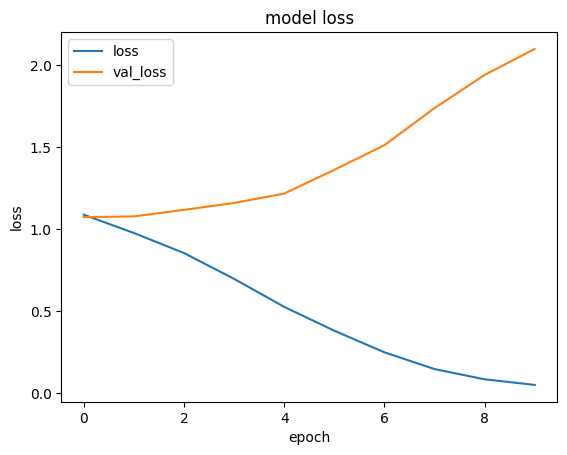

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

Shallow CNN

In [50]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters= 16, kernel_size= 1, activation='relu', input_shape=(100,8058)),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 100, 16)           128944    
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 100, 16)          0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_15 (Dense)            (None, 32)                51232     
                                                                 
 dense_16 (Dense)            (None, 3)                 99        
                                                                 
Total params: 180,275
Trainable params: 180,275
Non-trainable params: 0
________________________________________________

In [51]:
history=model.fit(x_train,y_train, epochs= 10,batch_size=4,
                validation_data=[x_test, y_test], callbacks=[callback])
print(history.history.keys())

Epoch 1/10
185/185 [==============================] - 8s 38ms/step - loss: 1.0566 - accuracy: 0.4446 - val_loss: 1.1093 - val_accuracy: 0.3189
Epoch 2/10
185/185 [==============================] - 5s 29ms/step - loss: 0.7995 - accuracy: 0.6270 - val_loss: 1.3192 - val_accuracy: 0.4000
Epoch 3/10
185/185 [==============================] - 7s 36ms/step - loss: 0.2238 - accuracy: 0.9527 - val_loss: 1.8353 - val_accuracy: 0.3784
Epoch 4/10
185/185 [==============================] - 6s 30ms/step - loss: 0.0400 - accuracy: 0.9973 - val_loss: 1.9481 - val_accuracy: 0.3622
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


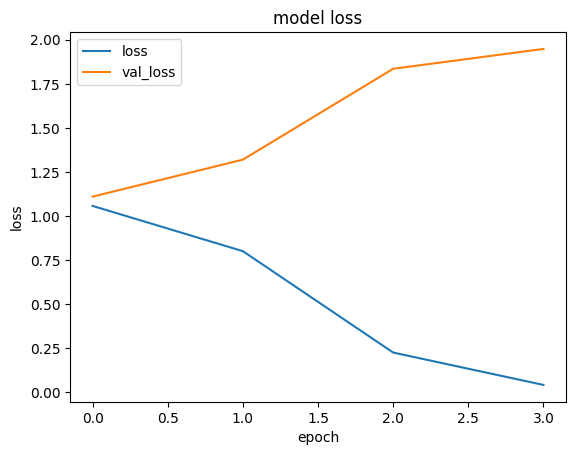

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

# AutoEncoder CNN

Model of AutoCNN

In [57]:
from keras.layers.serialization import activation
input_img = keras.Input(shape=(100,8058)) # input layer
x = layers.Conv1D(16, 1, activation='relu', padding='same')(input_img)
# 16 --> number of filter:16 types of features  , 1 --> size of filters , porer layer er ftr dimension == no. of features--> (None, 100, 16)
# 100 time karon 1 d nichi ofc kombe na eta
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
#ncoder = OneHotEncoder(sparse=False)
# why do we do onw hot encoding , to represent the presence of all the classes in each label ,  and to show what we chose
#onehot = ncoder.fit_transform(p)
x = layers.MaxPooling1D(2, padding='same')(x)
#after max pooling divide the feature space by 2 hence having --> (None, 50, 16)---> maxpooling ---> learnt feature gulo komiye dichi
x = layers.Conv1D(8, 1, activation='relu', padding='same')(x) # 1D bole eta one
x = layers.MaxPooling1D(2, padding='same')(x)
# drop out jodi lagey
x = layers.Conv1D(4, 1, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(2, padding='same')(x)
x = layers.Conv1D(2, 1, activation='relu', padding='same')(x)

x = layers.MaxPooling1D(2, padding='same')(x)
flat=layers.Flatten()(x)






dense=layers.Dense(14, activation='relu')(flat)
x=layers.Reshape((7,2))(dense)
x = layers.Conv1D(2, 1, activation='relu', padding='same')(x)
x = layers.UpSampling1D((2))(x)
x = layers.Conv1D(4, 1, activation='relu', padding='same')(x)
x = layers.UpSampling1D(2)(x)
x = layers.Conv1D(8, 1, activation='relu', padding='same')(x)
x = layers.UpSampling1D(2)(x)
x = layers.Conv1D(16, 1, activation='relu',padding='same')(x)
x = layers.UpSampling1D(2)(x)
x = layers.Conv1D(1,1,  activation='sigmoid', padding='same')(x)
decoded= layers.Cropping1D(cropping=(12, 0))(x)


In [58]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 8058)]       0         
                                                                 
 conv1d_9 (Conv1D)           (None, 100, 16)           128944    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 50, 16)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 50, 8)             136       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 25, 8)            0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 25, 4)             36  

In [59]:
trained_autoencoder = autoencoder.fit(x_train,x_train, epochs= 10,batch_size=16,
                validation_data=[x_test, x_test])
print(trained_autoencoder.history.keys())

Epoch 1/10
47/47 [==============================] - 18s 300ms/step - loss: 0.2529 - val_loss: 0.2426
Epoch 2/10
47/47 [==============================] - 12s 254ms/step - loss: 0.2305 - val_loss: 0.2180
Epoch 3/10
47/47 [==============================] - 12s 262ms/step - loss: 0.2040 - val_loss: 0.1897
Epoch 4/10
47/47 [==============================] - 13s 282ms/step - loss: 0.1749 - val_loss: 0.1601
Epoch 5/10
47/47 [==============================] - 12s 265ms/step - loss: 0.1456 - val_loss: 0.1317
Epoch 6/10
47/47 [==============================] - 12s 263ms/step - loss: 0.1185 - val_loss: 0.1065
Epoch 7/10
47/47 [==============================] - 12s 263ms/step - loss: 0.0954 - val_loss: 0.0857
Epoch 8/10
47/47 [==============================] - 12s 261ms/step - loss: 0.0768 - val_loss: 0.0693
Epoch 9/10
47/47 [==============================] - 13s 281ms/step - loss: 0.0624 - val_loss: 0.0569
Epoch 10/10
47/47 [==============================] - 12s 261ms/step - loss: 0.0515 - val_lo

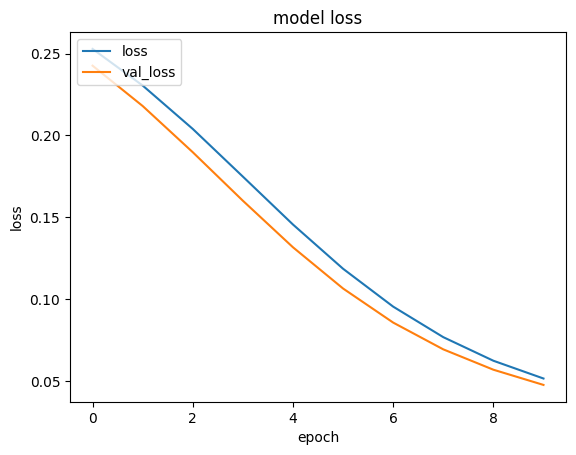

In [60]:
plt.plot(trained_autoencoder.history['loss'])
plt.plot(trained_autoencoder.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

Encoded space

In [61]:
encoder = keras.Model(input_img, dense)
encoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 8058)]       0         
                                                                 
 conv1d_9 (Conv1D)           (None, 100, 16)           128944    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 50, 16)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 50, 8)             136       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 25, 8)            0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 25, 4)             36  

In [62]:
encoded_imgs = encoder.predict(x_test)

6/6 [==============================] - 1s 112ms/step


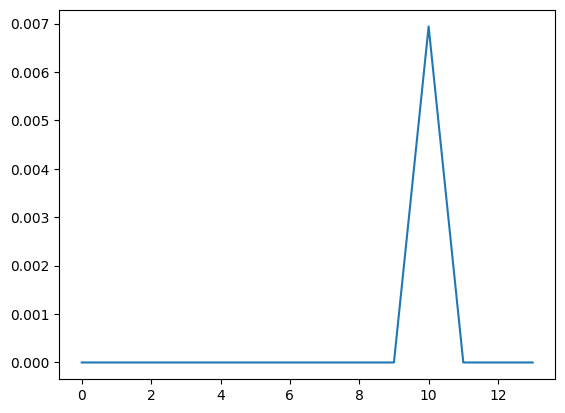

In [63]:
plt.plot(encoded_imgs[0])

Trying other models

In [64]:
lastbutone=keras.Model(input_img, dense)

In [65]:
deep_features = lastbutone.predict(x_train) # x_train

24/24 [==============================] - 3s 100ms/step


In [89]:
deep_features_test = lastbutone.predict(x_test)
deep_features_test.shape

6/6 [==============================] - 2s 292ms/step


(185, 14)

Random Forest with cv =5

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#rf = RandomForestClassifier(n_estimators=5,max_depth=20)
#'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 10}
clf = RandomForestClassifier(n_estimators = 10, max_depth = 20 , min_samples_leaf=5).fit(deep_features, y_train)
clf.fit(deep_features,y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10)

In [115]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
prediction = clf.predict(deep_features_test)
y_pred = np.argmax(prediction,axis=1)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))


0.34594594594594597
0.238618804563077


In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.3027027027027027



Can go fancy with a grid search

In [117]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [100,200], 'min_samples_leaf': [100,200], 'n_estimators': [10,25,30,50,100,200]}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(deep_features, y_train)


Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [100, 200],
                         'min_samples_leaf': [100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [118]:
print(" Results from Grid Search " )
print("\n The best estimator ",grid_search.best_estimator_)
print("\n The best score",grid_search.best_score_)
print("\n The best parameters ",grid_search.best_params_)

 Results from Grid Search 

 The best estimator  RandomForestClassifier(max_depth=100, min_samples_leaf=100, n_estimators=10,
                       n_jobs=-1, random_state=42)

 The best score 0.0

 The best parameters  {'max_depth': 100, 'min_samples_leaf': 100, 'n_estimators': 10}


Gradient Boost [NOT WORKING AT ALL]

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }



In [125]:
y_train = np.argmax(y_train,axis=1)


In [126]:
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBC.fit(deep_features, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [127]:
print(" Results from Grid Search " )
print("\n The best estimator ",grid_search.best_estimator_)
print("\n The best score",grid_search.best_score_)
print("\n The best parameters ",grid_search.best_params_)

 Results from Grid Search 

 The best estimator  RandomForestClassifier(max_depth=100, min_samples_leaf=100, n_estimators=10,
                       n_jobs=-1, random_state=42)

 The best score 0.0

 The best parameters  {'max_depth': 100, 'min_samples_leaf': 100, 'n_estimators': 10}
